In [0]:

from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType, FloatType
import re
storage_account_name = "sistemarecomend"
container_name = "mineria"
file_name = "cars_price_dataset.csv"
storage_account_key = "xPgNiIW9/cJkCdwd2A6dn3ZJQuv1yDDachFh7DYpd0C+hEuVxn6AkH/zBG7OFJH3qDM7LwBnjfL9+AStwlJBZg=="

# Establecer la configuración de la llave de la cuenta de almacenamiento
spark.conf.set(
  f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net",
  storage_account_key
)

# Define the input path
input_path = f"wasbs://{container_name}@{storage_account_name}.blob.core.windows.net/{file_name}"

# Define the Spark session
spark = SparkSession.builder.getOrCreate()


In [0]:
# Leer el archivos csv de la cuenta de almacenamiento
df = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferSchema", "true")\
    .load(input_path)

In [0]:
df.printSchema()

root
 |-- back_legroom: string (nullable = true)
 |-- bed: string (nullable = true)
 |-- bed_height: string (nullable = true)
 |-- bed_length: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- cabin: string (nullable = true)
 |-- city: string (nullable = true)
 |-- city_fuel_economy: double (nullable = true)
 |-- combine_fuel_economy: string (nullable = true)
 |-- daysonmarket: integer (nullable = true)
 |-- dealer_zip: string (nullable = true)
 |-- engine_cylinders: string (nullable = true)
 |-- engine_displacement: double (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- exterior_color: string (nullable = true)
 |-- fleet: boolean (nullable = true)
 |-- frame_damaged: boolean (nullable = true)
 |-- franchise_dealer: boolean (nullable = true)
 |-- franchise_make: string (nullable = true)
 |-- front_legroom: string (nullable = true)
 |-- fuel_tank_volume: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- has_accidents: boolean (

In [0]:
display(df.limit(30))

back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_name,theft_title,torque,transmission,transmission_display,trimId,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
35.7 in,null,null,null,SUV / Crossover,null,Raynham,26.0,null,183,2767,I4,1400.0,I4,Summit White,null,null,true,Chevrolet,40.8 in,14 gal,Gasoline,null,64.9 in,31.0,138.0,Jet Black,null,null,null,true,null,41.9042,167.6 in,2020-03-10,WHITE,-71.0131,Chevrolet,5 seats,0.0,Trax,null,"138 hp @ 4,900 RPM",14890.0,null,0,3.097560975609756,McGee Chevrolet of Raynham,null,148 lb-ft @ 200 RPM,A,Automatic,t85771,null,FWD,Front-Wheel Drive,100.6 in,69.9 in,2020
40.3 in,null,null,null,SUV / Crossover,null,Rochester Hills,19.0,null,130,48307,V6,3200.0,V6,Diamond Black Crystal Pearlcoat,null,null,true,Jeep,41.1 in,15.9 gal,Gasoline,null,66.2 in,27.0,271.0,Black,null,null,null,true,null,42.6619,182 in,2020-05-02,BLACK,-83.133,Jeep,5 seats,0.0,Cherokee,null,"270 hp @ 5,250 RPM",39625.0,null,0,4.5,Rochester Hills Chrysler Jeep Incorporated,null,"295 lb-ft @ 3,000 RPM",A,9-Speed Automatic,t87063,null,4WD,Four-Wheel Drive,106.6 in,73.2 in,2020
37.4 in,null,null,null,Sedan,null,Tulsa,29.0,null,44,74133,I4,1800.0,I4,Gray,true,false,false,null,42.5 in,13.2 gal,Gasoline,false,58.9 in,37.0,124.0,Black,true,null,null,false,null,36.0302,182.1 in,2020-07-29,GRAY,-95.8843,Nissan,5 seats,36049.0,Sentra,1.0,"124 hp @ 6,000 RPM",13998.0,false,573,4.8,CarMax Tulsa - Now offering Curbside Pickup,false,"125 lb-ft @ 3,600 RPM",A,Automatic,t83401,null,FWD,Front-Wheel Drive,106.3 in,69.3 in,2019
37.4 in,null,null,null,Sedan,null,Atlanta,29.0,null,41,30360,I4,2000.0,I4,Gun Metallic,null,null,true,Nissan,44 in,12.4 gal,Gasoline,null,56.9 in,39.0,149.0,Black (Charcoal),null,null,null,true,null,33.9087,182.7 in,2020-07-31,GRAY,-84.2834,Nissan,5 seats,6.0,Sentra,null,"149 hp @ 6,400 RPM",18549.0,null,0,3.4444444444444446,Mike Rezi Nissan Atlanta,null,"146 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,t91002,null,FWD,Front-Wheel Drive,106.8 in,71.5 in,2020
36.8 in,null,null,null,SUV / Crossover,null,Beavercreek Township,15.0,null,48,45434,V6,3600.0,V6,Mosaic Black Metallic,false,false,true,Chevrolet,41.3 in,22 gal,Gasoline,false,69.9 in,22.0,281.0,Black (Ebony),false,null,true,false,true,39.7058,203.7 in,2020-07-25,BLACK,-84.0198,Chevrolet,8 seats,39001.0,Traverse,1.0,"281 hp @ 6,300 RPM",26000.0,false,587,4.5,Jeff Schmitt Chevrolet East,false,"266 lb-ft @ 3,400 RPM",A,Automatic,t67376,null,FWD,Front-Wheel Drive,118.9 in,78.5 in,2017
39.3 in,null,null,null,SUV / Crossover,null,Lancaster,27.0,null,71,1523,I4,1800.0,I4,MODERN STE,null,null,true,Honda,41.2 in,13.2 gal,Gasoline,null,63.2 in,31.0,141.0,None,null,null,null,true,null,42.5205,170.4 in,2020-06-30,UNKNOWN,-71.7036,Honda,5 seats,21.0,HR-V,null,"141 hp @ 6,500 RPM",23440.0,null,0,3.8181818181818175,Ron Bouchard's Honda Store,null,"127 lb-ft @ 4,300 RPM",CVT,Continuously Variable Transmission,t89657,null,AWD,All-Wheel Drive,102.8 in,69.8 in,2020
34.7 in,null,--,78.7 in,Pickup Truck,null,Langhorne,13.0,null,17,19047,V8,5700.0,V8,Super White,null,null,true,Toyota,42.5 in,26.4 gal,Gasoline,null,76.4 in,17.0,381.0,White (Graphite),null,null,null,true,null,40.1637,228.9 in,2020-08-24,WHITE,-74.9046,Toyota,6 seats,0.0,Tundra,null,"381 hp @ 5,600 RPM",42853.0,null,0,4.32258064516129,Team Toyota of Langhorne,null,"401 lb-ft @ 3,600 RPM",A,Automatic,t88080,null,4WD,Four-Wheel Drive,145.7 in,79.9 in,2020
35 in,null,null,null,SUV / 

In [0]:
# Modificar los valores de las variables que tienen números y string para dejar solo la parte numérica
from pyspark.sql.functions import regexp_replace
from pyspark.sql.types import FloatType

columns_to_process = ["back_legroom", "Front_legroom", "fuel_tank_volume","Height",'Length','Wheelbase','Width','bed_length']

for column in columns_to_process:
    df = df.withColumn(column, regexp_replace(column, "[^0-9.]+", ""))
    df = df.withColumn(column, df[column].cast(FloatType()))

In [0]:
# Eliminar todo lo que esté después del primer número
from pyspark.sql.functions import regexp_extract
from pyspark.sql.types import IntegerType
# Replace 'column_name' with the name of the column you want to process
df = df.withColumn("torque", regexp_extract("torque", r"(\d+)", 1))
df = df.withColumn("torque", df["torque"].cast(IntegerType()))
df = df.withColumn("transmission_display", regexp_extract("transmission_display", r"(\d+)", 1))
df = df.withColumn("transmission_display", df["transmission_display"].cast(IntegerType()))


In [0]:
display(df.limit(10))

back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,Front_legroom,fuel_tank_volume,fuel_type,has_accidents,Height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,Length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_name,theft_title,torque,transmission,transmission_display,trimId,vehicle_damage_category,wheel_system,wheel_system_display,Wheelbase,Width,year
35.7,null,null,null,SUV / Crossover,null,Raynham,26.0,null,183,2767,I4,1400.0,I4,Summit White,null,null,true,Chevrolet,40.8,14.0,Gasoline,null,64.9,31.0,138.0,Jet Black,null,null,null,true,null,41.9042,167.6,2020-03-10,WHITE,-71.0131,Chevrolet,5 seats,0.0,Trax,null,"138 hp @ 4,900 RPM",14890.0,null,0,3.097560975609756,McGee Chevrolet of Raynham,null,148,A,null,t85771,null,FWD,Front-Wheel Drive,100.6,69.9,2020
40.3,null,null,null,SUV / Crossover,null,Rochester Hills,19.0,null,130,48307,V6,3200.0,V6,Diamond Black Crystal Pearlcoat,null,null,true,Jeep,41.1,15.9,Gasoline,null,66.2,27.0,271.0,Black,null,null,null,true,null,42.6619,182.0,2020-05-02,BLACK,-83.133,Jeep,5 seats,0.0,Cherokee,null,"270 hp @ 5,250 RPM",39625.0,null,0,4.5,Rochester Hills Chrysler Jeep Incorporated,null,295,A,9,t87063,null,4WD,Four-Wheel Drive,106.6,73.2,2020
37.4,null,null,null,Sedan,null,Tulsa,29.0,null,44,74133,I4,1800.0,I4,Gray,true,false,false,null,42.5,13.2,Gasoline,false,58.9,37.0,124.0,Black,true,null,null,false,null,36.0302,182.1,2020-07-29,GRAY,-95.8843,Nissan,5 seats,36049.0,Sentra,1.0,"124 hp @ 6,000 RPM",13998.0,false,573,4.8,CarMax Tulsa - Now offering Curbside Pickup,false,125,A,null,t83401,null,FWD,Front-Wheel Drive,106.3,69.3,2019
37.4,null,null,null,Sedan,null,Atlanta,29.0,null,41,30360,I4,2000.0,I4,Gun Metallic,null,null,true,Nissan,44.0,12.4,Gasoline,null,56.9,39.0,149.0,Black (Charcoal),null,null,null,true,null,33.9087,182.7,2020-07-31,GRAY,-84.2834,Nissan,5 seats,6.0,Sentra,null,"149 hp @ 6,400 RPM",18549.0,null,0,3.4444444444444446,Mike Rezi Nissan Atlanta,null,146,CVT,null,t91002,null,FWD,Front-Wheel Drive,106.8,71.5,2020
36.8,null,null,null,SUV / Crossover,null,Beavercreek Township,15.0,null,48,45434,V6,3600.0,V6,Mosaic Black Metallic,false,false,true,Chevrolet,41.3,22.0,Gasoline,false,69.9,22.0,281.0,Black (Ebony),false,null,true,false,true,39.7058,203.7,2020-07-25,BLACK,-84.0198,Chevrolet,8 seats,39001.0,Traverse,1.0,"281 hp @ 6,300 RPM",26000.0,false,587,4.5,Jeff Schmitt Chevrolet East,false,266,A,null,t67376,null,FWD,Front-Wheel Drive,118.9,78.5,2017
39.3,null,null,null,SUV / Crossover,null,Lancaster,27.0,null,71,1523,I4,1800.0,I4,MODERN STE,null,null,true,Honda,41.2,13.2,Gasoline,null,63.2,31.0,141.0,None,null,null,null,true,null,42.5205,170.4,2020-06-30,UNKNOWN,-71.7036,Honda,5 seats,21.0,HR-V,null,"141 hp @ 6,500 RPM",23440.0,null,0,3.8181818181818175,Ron Bouchard's Honda Store,null,127,CVT,null,t89657,null,AWD,All-Wheel Drive,102.8,69.8,2020
34.7,null,--,78.7,Pickup Truck,null,Langhorne,13.0,null,17,19047,V8,5700.0,V8,Super White,null,null,true,Toyota,42.5,26.4,Gasoline,null,76.4,17.0,381.0,White (Graphite),null,null,null,true,null,40.1637,228.9,2020-08-24,WHITE,-74.9046,Toyota,6 seats,0.0,Tundra,null,"381 hp @ 5,600 RPM",42853.0,null,0,4.32258064516129,Team Toyota of Langhorne,null,401,A,null,t88080,null,4WD,Four-Wheel Drive,145.7,79.9,2020
35.0,null,null,null,SUV / Crossover,null,Austin,15.0,null,4,78757,I6,4000.0,I6,Red,false,false,false,null,41.1,19.0,Gasoline,false,70.9,17.0,190.0,None,false,null,null,false,null,30.3433,155.4,2020-09-07,RED,-97.7385,Jeep,4 seats,89977.0,Wrangler,3.0,"190 hp @ 4,600 RPM",17998.0,false,5621,4.566666666666666,JD Motors,false,235,M,null,t7052,null,4WD,Four-Wheel Drive,93.4,66.7,2003
35.2,null,--,79.4,Pickup 

In [0]:
# Summary of numerical features
numerical_columns = ["back_legroom",'city_fuel_economy','daysonmarket','engine_displacement','Front_legroom','Height','horsepower','Length','mileage','price','seller_rating','torque','Wheelbase','Width']  # Ubicar todas las variables numéricas del dataset
summary = df.select(numerical_columns).describe()
display(summary)


summary,back_legroom,city_fuel_economy,daysonmarket,engine_displacement,Front_legroom,Height,horsepower,Length,mileage,price,seller_rating,torque,Wheelbase,Width
count,275694,250902,300004,282817,282543,284044,282817,284044,285570,300004,295967,248152,284045,284042
mean,37.96444500183011,22.701987230073893,76.09725870321729,2971.952181092367,42.20261628647953,65.89440161893346,248.08907880360798,193.71883953423946,31446.50156879224,29968.65865867455,4.2713043022364445,265.56291305328995,115.35063005065408,78.39960757150054
stddev,3.180016640764059,8.829510698933147,109.28482725833345,1351.3062686244455,1.5066821954009435,7.5656467152146245,90.44263721032027,20.28267663655922,192511.55573055596,21808.79717029332,0.5119699732348845,120.08785343929881,14.539970114425078,7.690122490039318
min,0.0,7.0,0,700.0,29.0,43.9,65.0,106.1,0.0,250.0,1.0,68,73.5,61.4
max,59.8,127.0,2915,8400.0,67.0,117.6,949.0,290.0,9.9999988E7,3299995.0,5.0,935,201.0,106.0


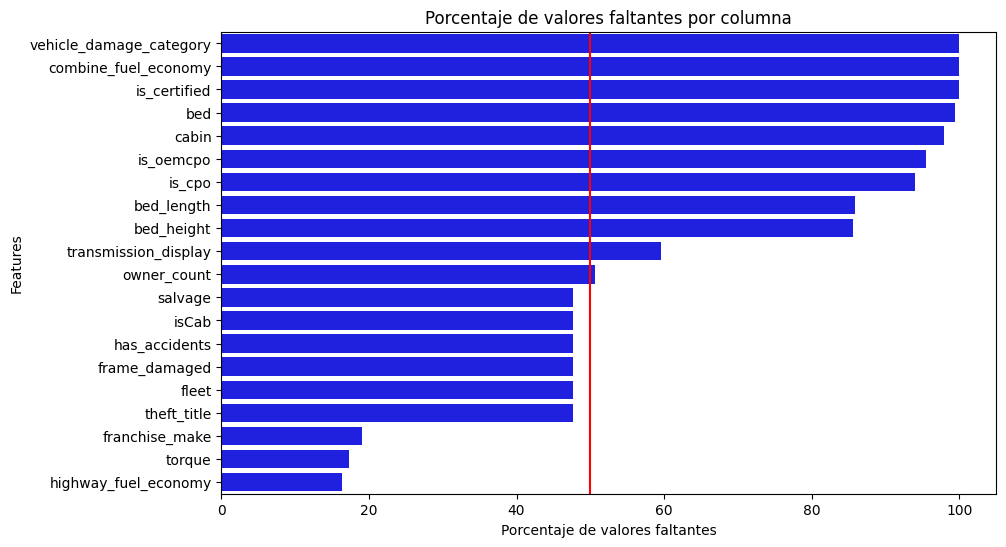

In [0]:
from pyspark.sql.functions import col, sum as spark_sum
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calcular el porcentaje de missings de cada columna
missing_data = {c: (df.where(col(c).isNull()).count() / df.count()) * 100 for c in df.columns}

# Convertir el diccionario a un dataframe de pandas y organizar el índice
missing_data_pd = pd.DataFrame.from_dict(missing_data, orient='index', columns=['missing_percentage'])
missing_data_pd = missing_data_pd[missing_data_pd['missing_percentage'] != 0].sort_values(by='missing_percentage', ascending=False)

# Obtener las columnas con más missings
missing_data_pd = missing_data_pd[:20]

# Ver el plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_pd['missing_percentage'], y=missing_data_pd.index, color='blue')

# Añadir a línea de referencia del 50%
plt.axvline(x=50, color='red')

# Añadir los títulos a los ejes
plt.xlabel('Porcentaje de valores faltantes')
plt.ylabel('Features')
plt.title('Porcentaje de valores faltantes por columna')

plt.show()


In [0]:
# Explorar la lista de colores de los vehículos para ver en dónde se pueden agrugar
df.groupBy('listing_color').count().show()
df.groupBy('listing_color').count().orderBy('count', ascending=False).show()

In [0]:
# Filtar las columnas que tengan más del 10% de datos faltantes

from pyspark.sql.functions import col, count, when, lit

# Define a helper function to calculate the percentage of missing values
def missing_percentage(df, col):
    return (df.filter(df[col].isNull()).count() / df.count()) * 100

# Iterate over dataframe columns and calculate missing percentage for each
missing_percent = []
for c in df.columns:
    missing_percent.append((c, missing_percentage(df, c)))

# Filter out columns having missing percentage > 20%
missing_cols = [col for col, perc in missing_percent if perc > 20]

# Drop these columns from original dataframe
df_clean = df.drop(*missing_cols)


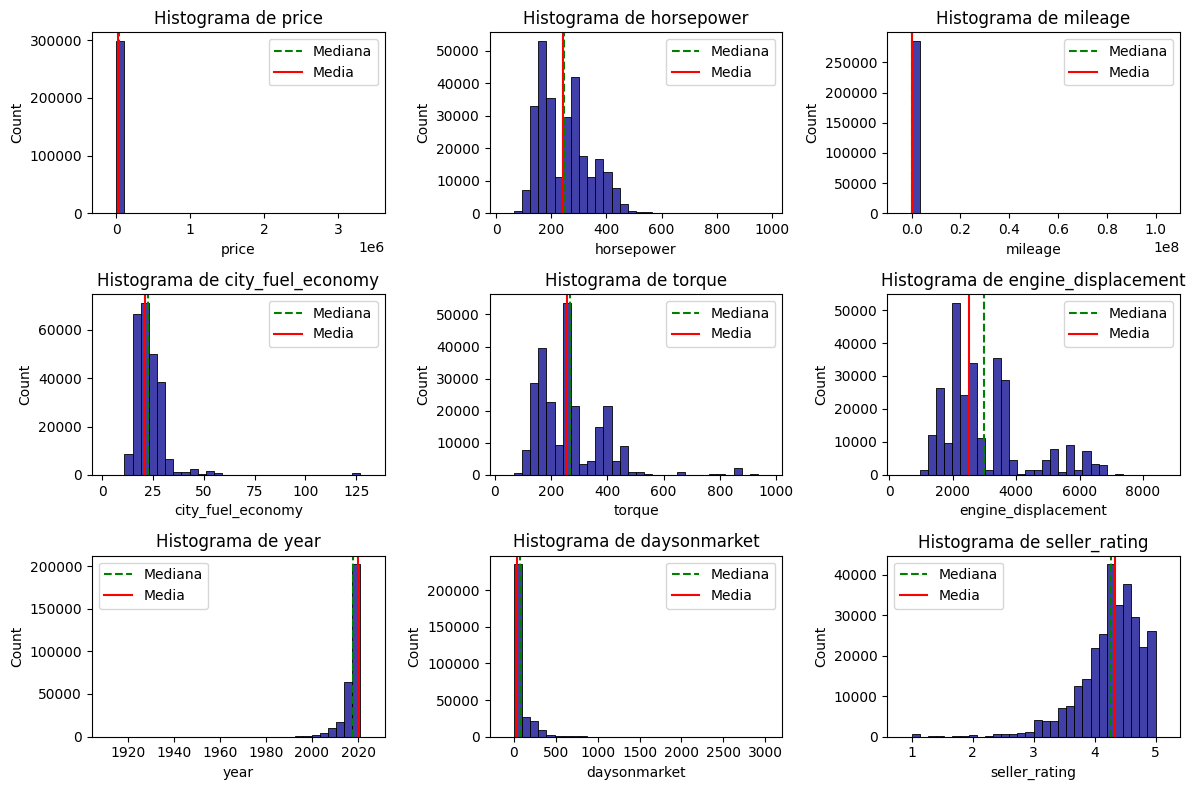

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de las variables numéricas
numerical_features = ['price', 'horsepower', 'mileage','city_fuel_economy','torque','engine_displacement',
                      'year','daysonmarket','seller_rating'] 

fig, axs = plt.subplots(3, 3, figsize=(12, 8))
axs = axs.ravel()  # Flatten the axes array

for i, feature in enumerate(numerical_features):
    # Convert to pandas dataframe for plotting
    pandas_df = df.select(feature).toPandas()

    sns.histplot(pandas_df[feature], kde=False, color='darkblue', bins=30, ax=axs[i])
    
    mean = pandas_df[feature].mean()
    median = pandas_df[feature].median()
    
    axs[i].axvline(mean, color='green', linestyle='--', label='Mediana')
    axs[i].axvline(median, color='red', linestyle='-', label='Media')
    
    # Get min and max value of the feature
    min_val = pandas_df[feature].min()
    max_val = pandas_df[feature].max()

    # Set x-axis limits to be slightly wider than the min and max
    axs[i].set_xlim([min_val - 0.1 * (max_val - min_val), max_val + 0.1 * (max_val - min_val)])
    
    axs[i].set_title(f'Histograma de {feature}')
    axs[i].legend()

# Adjust the layout for better appearance
plt.tight_layout()
plt.show()


In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Ver la lista de variables numéricas
numerical_features = ['price', 'horsepower', 'mileage','city_fuel_economy','torque','engine_displacement',
                      'year','daysonmarket','seller_rating'] 

# Remover los valores nulos
df = df.na.drop(subset=numerical_features)

# Unir la información en un vector para calcular la correlación
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numerical_features, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# Obtener la matriz de correlación
matrix = Correlation.corr(df_vector, vector_col)

# Convertir la matriz de correlación a pandas
correlation_matrix = matrix.collect()[0]["pearson({})".format(vector_col)].values
num_features = len(numerical_features)
correlation_matrix = correlation_matrix.reshape((num_features,num_features))
correlation_df = pd.DataFrame(correlation_matrix, index=numerical_features, columns=numerical_features)


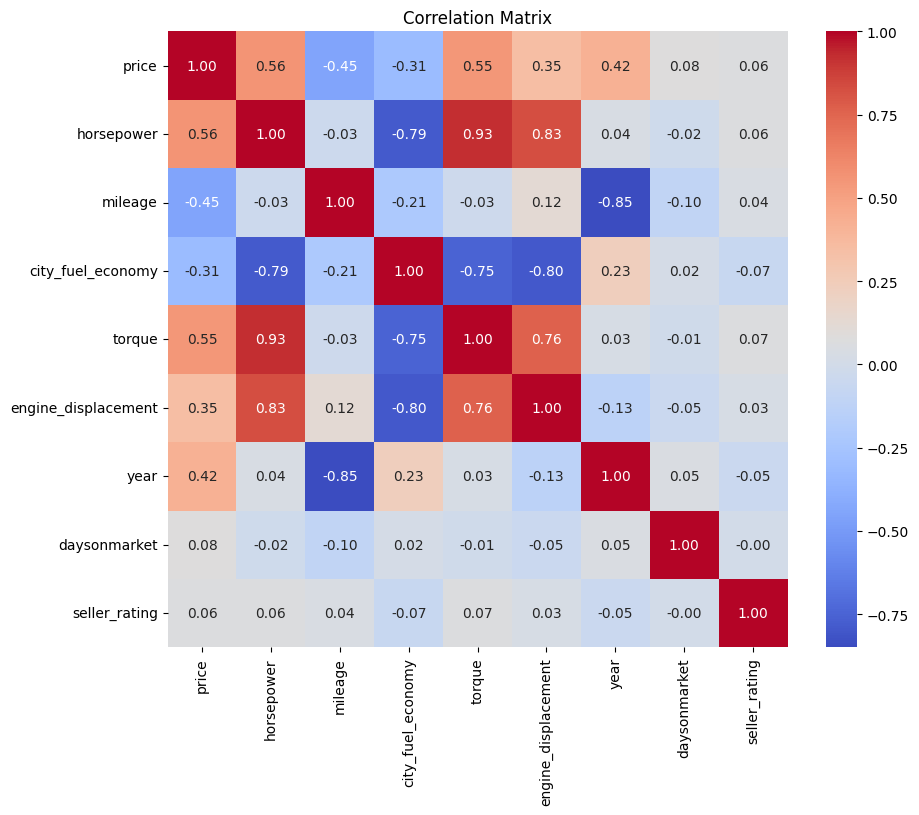

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()


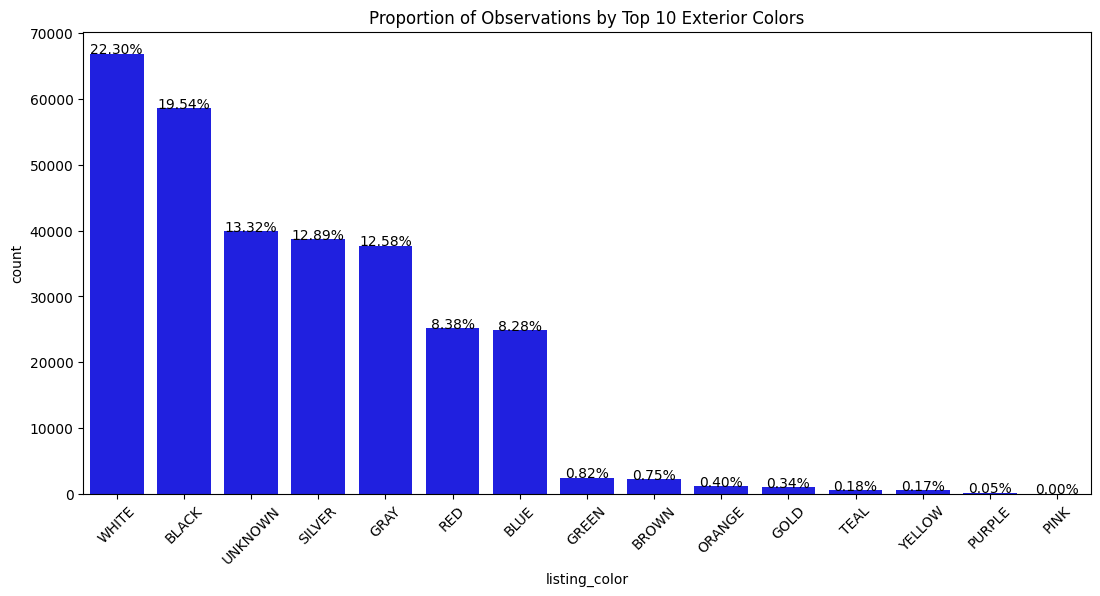

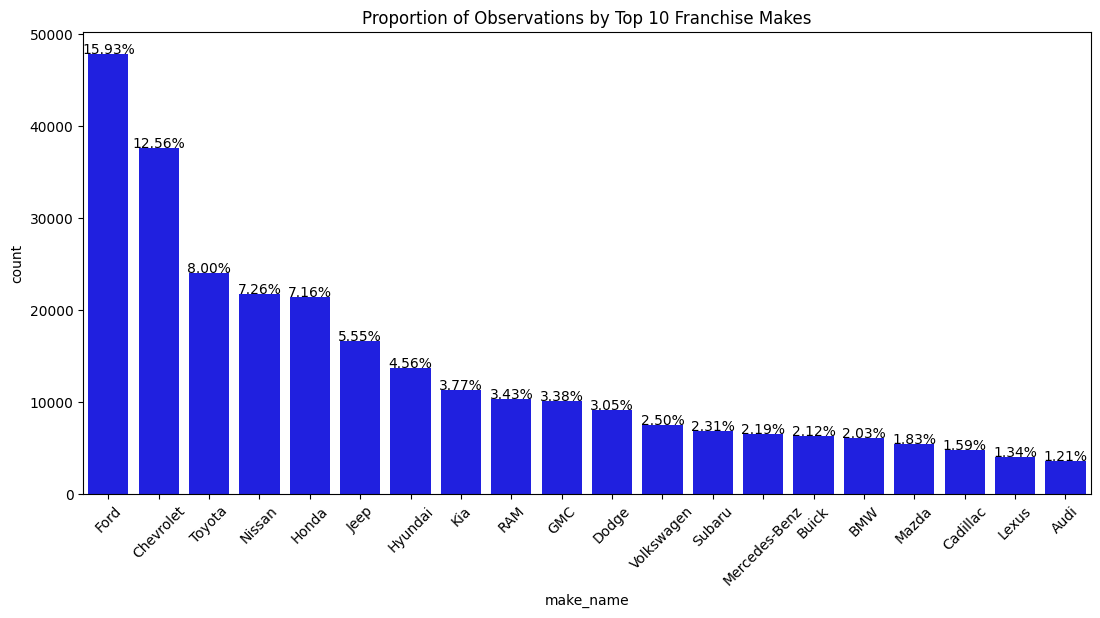

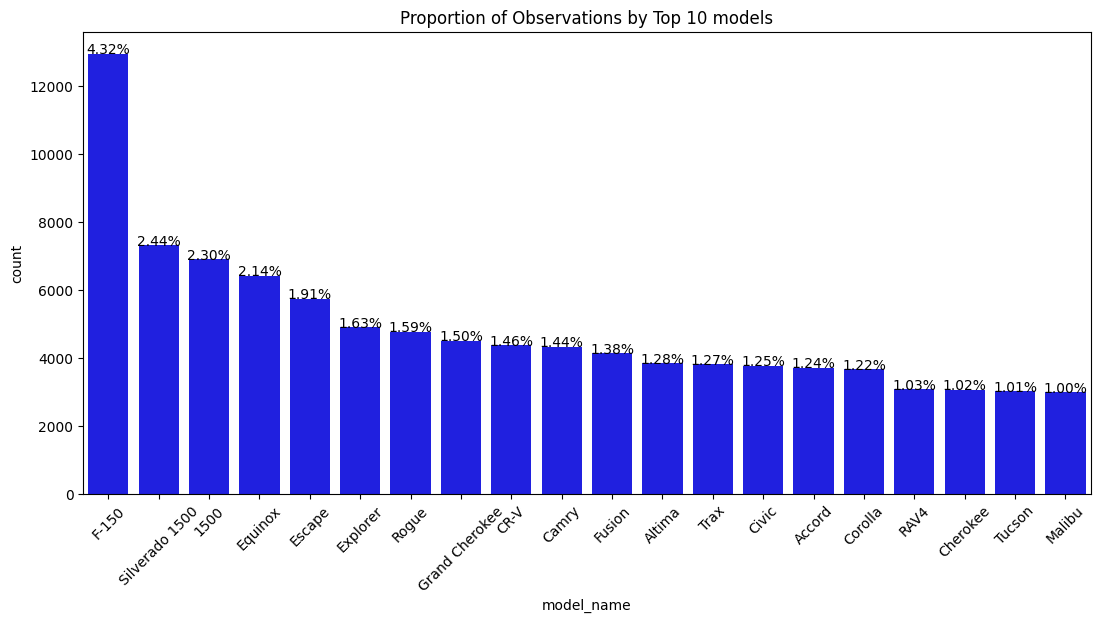

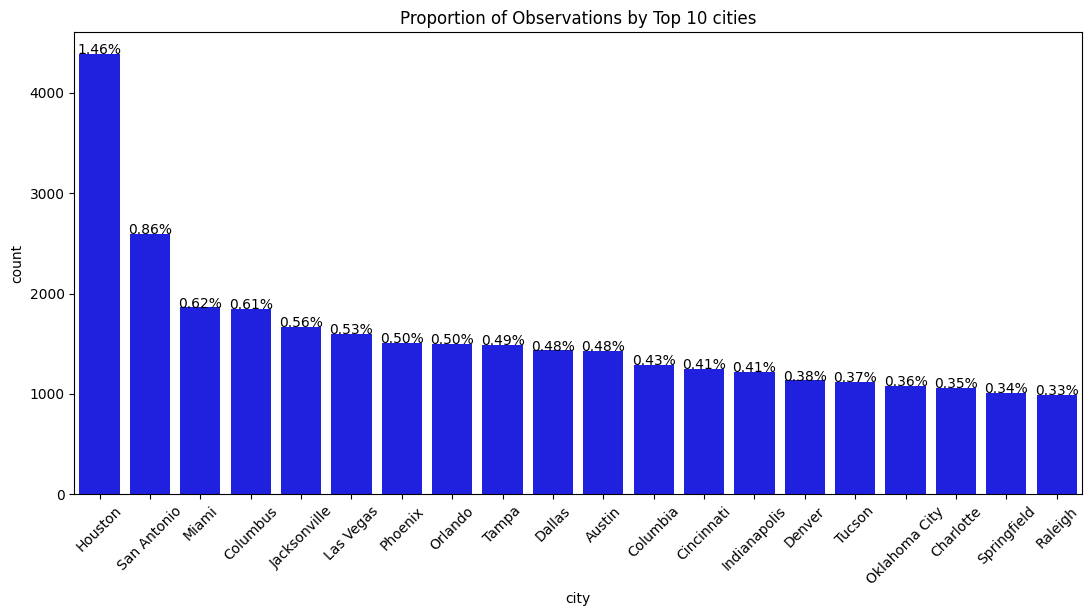

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_proportion_by_category(spark_df, category_col, title, color='blue', top_k=None, figsize=(13,6)):
    # Convert to pandas dataframe for plotting
    data = spark_df.toPandas()
    total = len(data)
    
    if top_k:
        top_categories = data[category_col].value_counts().index[:top_k]
        data = data[data[category_col].isin(top_categories)]

    plt.figure(figsize=figsize)
    ax = sns.countplot(x=category_col, data=data, color=color, order=data[category_col].value_counts().index)

    # Calculate proportions
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, '{:.2f}%'.format(height / total * 100), ha="center")

    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# For 'listing_color'
plot_proportion_by_category(df, 'listing_color', 'Proportion of Observations by Top 10 Exterior Colors', top_k=20)

# For 'make_name'
plot_proportion_by_category(df, 'make_name', 'Proportion of Observations by Top 10 Franchise Makes', top_k=20)

# For 'model_name'
plot_proportion_by_category(df, 'model_name', 'Proportion of Observations by Top 10 models', top_k=20)

# For 'city'
plot_proportion_by_category(df, 'city', 'Proportion of Observations by Top 10 cities', top_k=20)


In [0]:
from pyspark.sql.functions import col, percentile_approx
from functools import reduce

# Function to filter values less than 1.5*IQR and greater than 1.5*IQR for each category
def filter_outliers(df, column, category_col, category):
    Q1, Q3 = df.filter(col(category_col) == category).approxQuantile(column, [0.25, 0.75], 0)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    return df.filter((col(category_col) == category) & (col(column) >= lower_whisker) & (col(column) <= upper_whisker))

# Apply the function to the DataFrame
# For 'listing_color'
top_colors = [row['listing_color'] for row in df.groupBy('listing_color').count().orderBy('count', ascending=False).limit(10).collect()]
filtered_df_colors = reduce(lambda a, b: a.union(b), [filter_outliers(df, 'price', 'listing_color', color) for color in top_colors])

# For 'franchise_make'
top_makes = [row['make_name'] for row in df.groupBy('make_name').count().orderBy('count', ascending=False).limit(10).collect()]
filtered_df_makes = reduce(lambda a, b: a.union(b), [filter_outliers(df, 'price', 'make_name', make) for make in top_makes])

# For 'model_name'
top_models = [row['model_name'] for row in df.groupBy('model_name').count().orderBy('count', ascending=False).limit(10).collect()]
filtered_df_models = reduce(lambda a, b: a.union(b), [filter_outliers(df, 'price', 'model_name', model) for model in top_models])

# For 'body_type'
top_bodies = [row['city'] for row in df.groupBy('city').count().orderBy('count', ascending=False).limit(10).collect()]
filtered_df_bodies = reduce(lambda a, b: a.union(b), [filter_outliers(df, 'price', 'city', body) for body in top_bodies])

# Convert to Pandas DataFrame for visualization
filtered_df_colors_pd = filtered_df_colors.toPandas()
filtered_df_makes_pd = filtered_df_makes.toPandas()
filtered_df_models_pd = filtered_df_models.toPandas()
filtered_df_bodies_pd = filtered_df_bodies.toPandas()


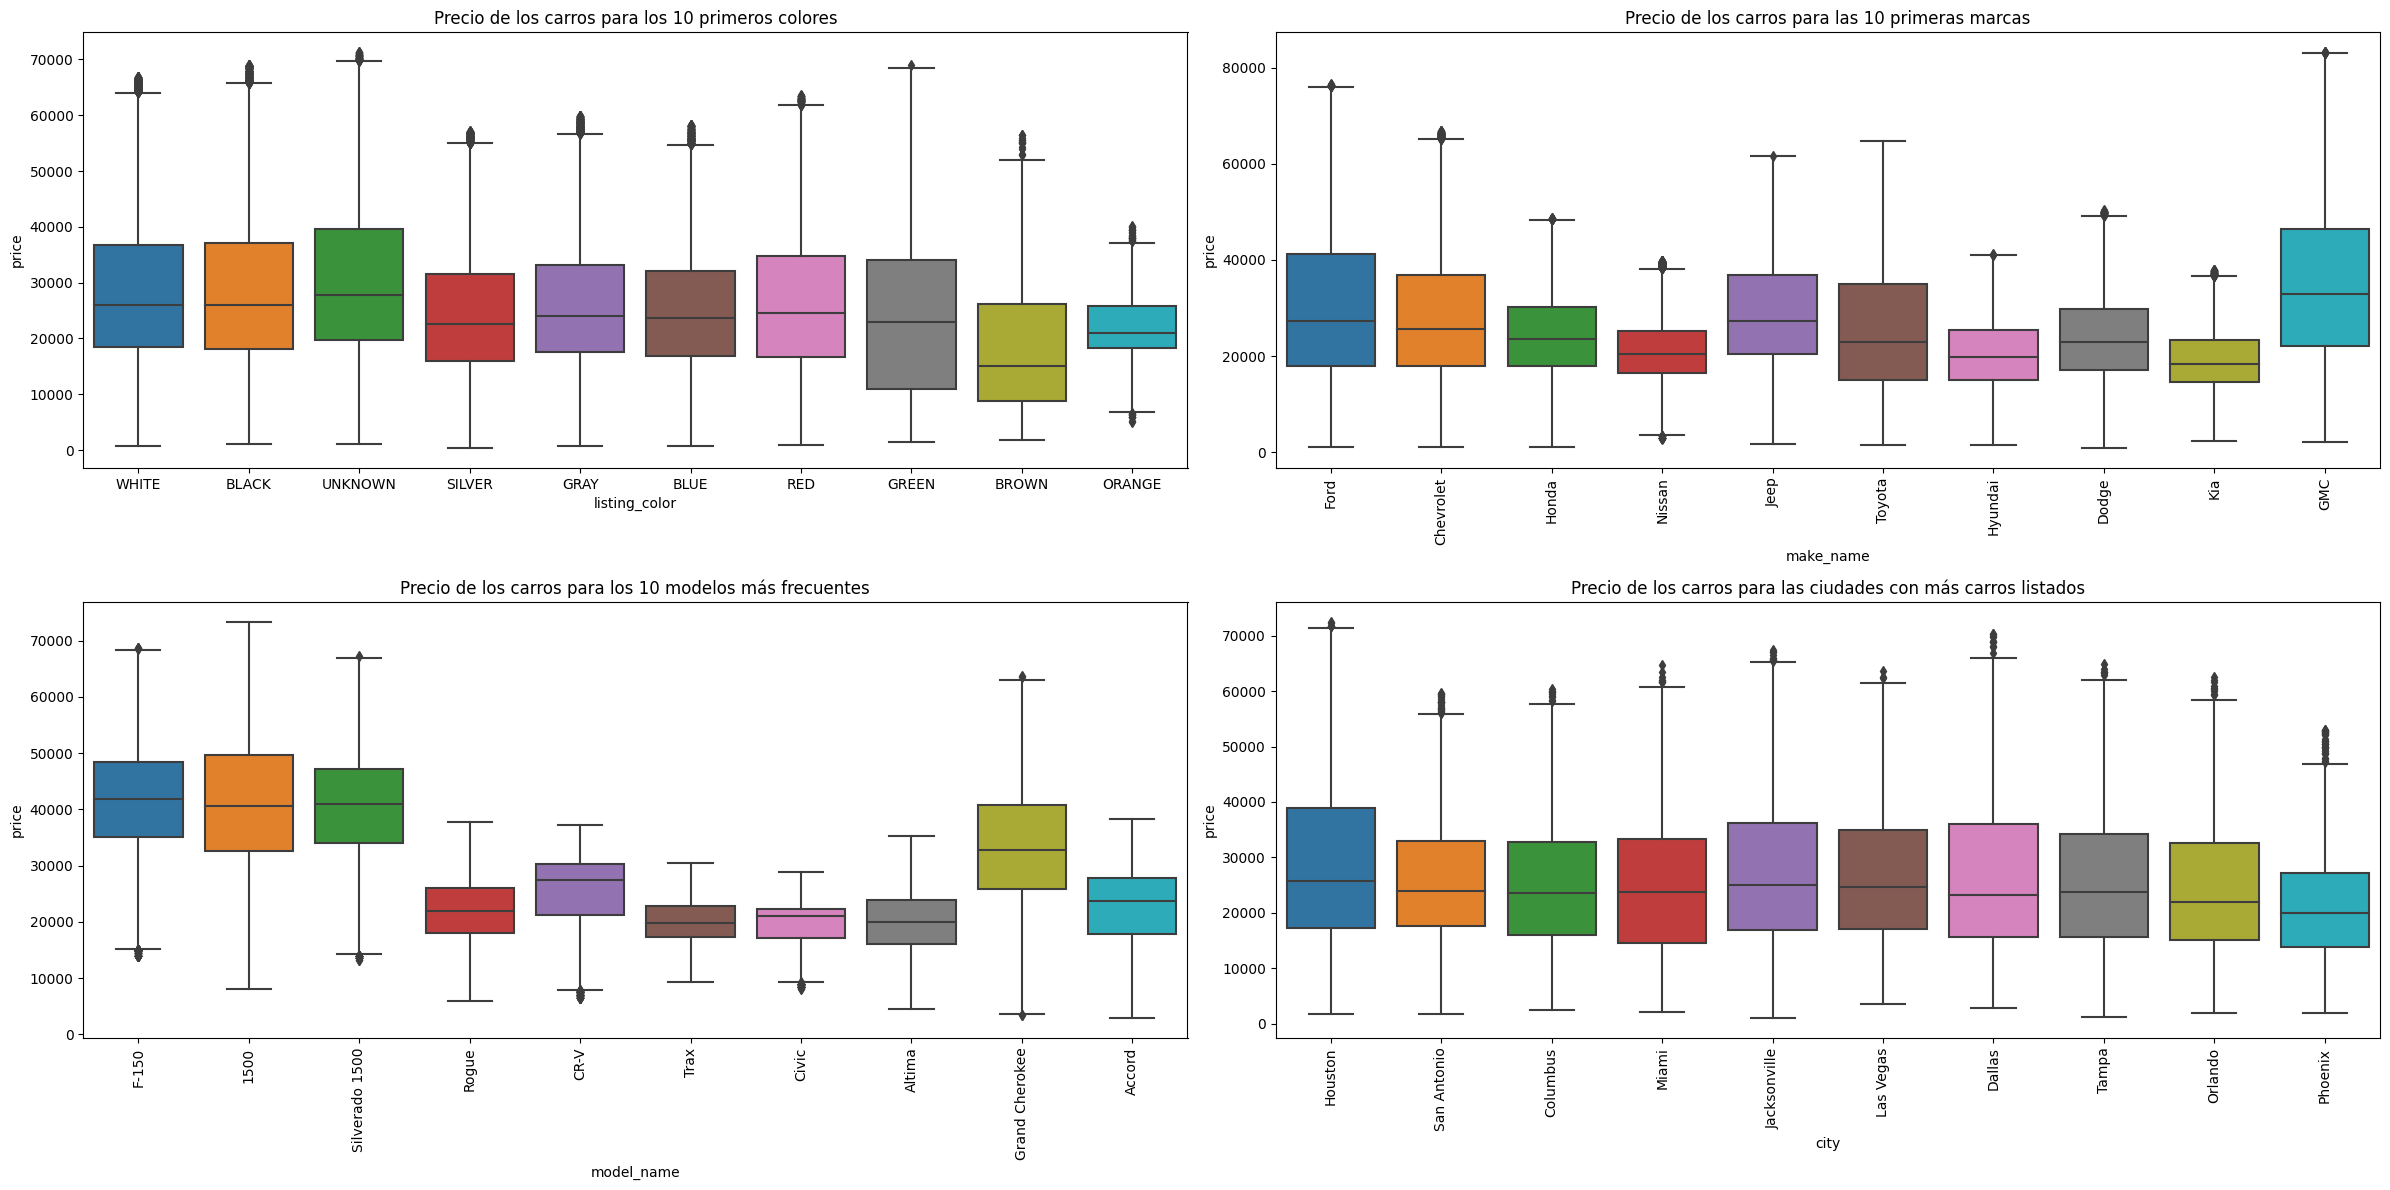

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(24, 12))

# For 'listing_color'
sns.boxplot(x='listing_color', y='price', data=filtered_df_colors_pd, order=top_colors, ax=axes[0, 0])
axes[0, 0].set_title('Precio de los carros para los 10 primeros colores')

# For 'franchise_make'
sns.boxplot(x='make_name', y='price', data=filtered_df_makes_pd, order=top_makes, ax=axes[0, 1])
axes[0, 1].set_title('Precio de los carros para las 10 primeras marcas')
axes[0, 1].tick_params(axis='x', rotation=90) 

# For 'model_name'
sns.boxplot(x='model_name', y='price', data=filtered_df_models_pd, order=top_models, ax=axes[1, 0])
axes[1, 0].set_title('Precio de los carros para los 10 modelos más frecuentes')
axes[1, 0].tick_params(axis='x', rotation=90) 

# For 'body_type'
sns.boxplot(x='city', y='price', data=filtered_df_bodies_pd, order=top_bodies, ax=axes[1, 1])
axes[1, 1].set_title('Precio de los carros para las ciudades con más carros listados')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
